In [1]:
# SETTINGS
base_path_project = "/home/till/projects/night-drive/"    # path to project fodler
save_path = base_path_project+"analysis/sample_images_by_weather_condition/"   # results path
root_dir = "/home/till/SharedFolder/CurrentDatasets/"
size = 100   # size of image display (html mode)
sample = 200   # number of images to display (html mode)

In [2]:
import os
import numpy as np
import pandas as pd
import sys
sys.path.append(base_path_project)
from utils.eval_utils import plot_imagegrid
from utils.eval_dataset import EvalDataset

In [3]:
# load original BDD data
orig = EvalDataset(root_dir, database=['bdd_train','bdd_valid'])
orig.data.head()

>> Loading annotations for data set 'bdd_train' ...
A
>> Loading annotations for data set 'bdd_valid' ...
AA


,labels,name,weather,timeofday,scene
0,"[{'category': 'traffic light', 'attributes': {...",/home/till/SharedFolder/CurrentDatasets/images...,clear,daytime,city street
1,"[{'category': 'traffic sign', 'attributes': {'...",/home/till/SharedFolder/CurrentDatasets/images...,clear,dawn/dusk,highway
2,"[{'category': 'car', 'attributes': {'occluded'...",/home/till/SharedFolder/CurrentDatasets/images...,clear,dawn/dusk,residential
3,"[{'category': 'traffic sign', 'attributes': {'...",/home/till/SharedFolder/CurrentDatasets/images...,clear,night,city street
4,"[{'category': 'car', 'attributes': {'occluded'...",/home/till/SharedFolder/CurrentDatasets/images...,clear,night,highway


In [7]:
# 
list_splits = [*orig.list_splits, *orig.list_splits_over]
list_weather = orig.list_weather

In [5]:
orig.get_crosstab_timeofdayxweather()

weather,clear,foggy,overcast,partly cloudy,rainy,snowy,undefined
timeofday,,,,,,,
dawn/dusk,2311,16,1329,665,383,510,591
daytime,14218,53,8590,4900,2918,3284,8023
night,26158,74,90,54,2494,2522,508
undefined,3,0,0,0,13,2,154


>> Loading annotations for data set 'train_A' ...
AA


TypeError: 'zip' object is not subscriptable

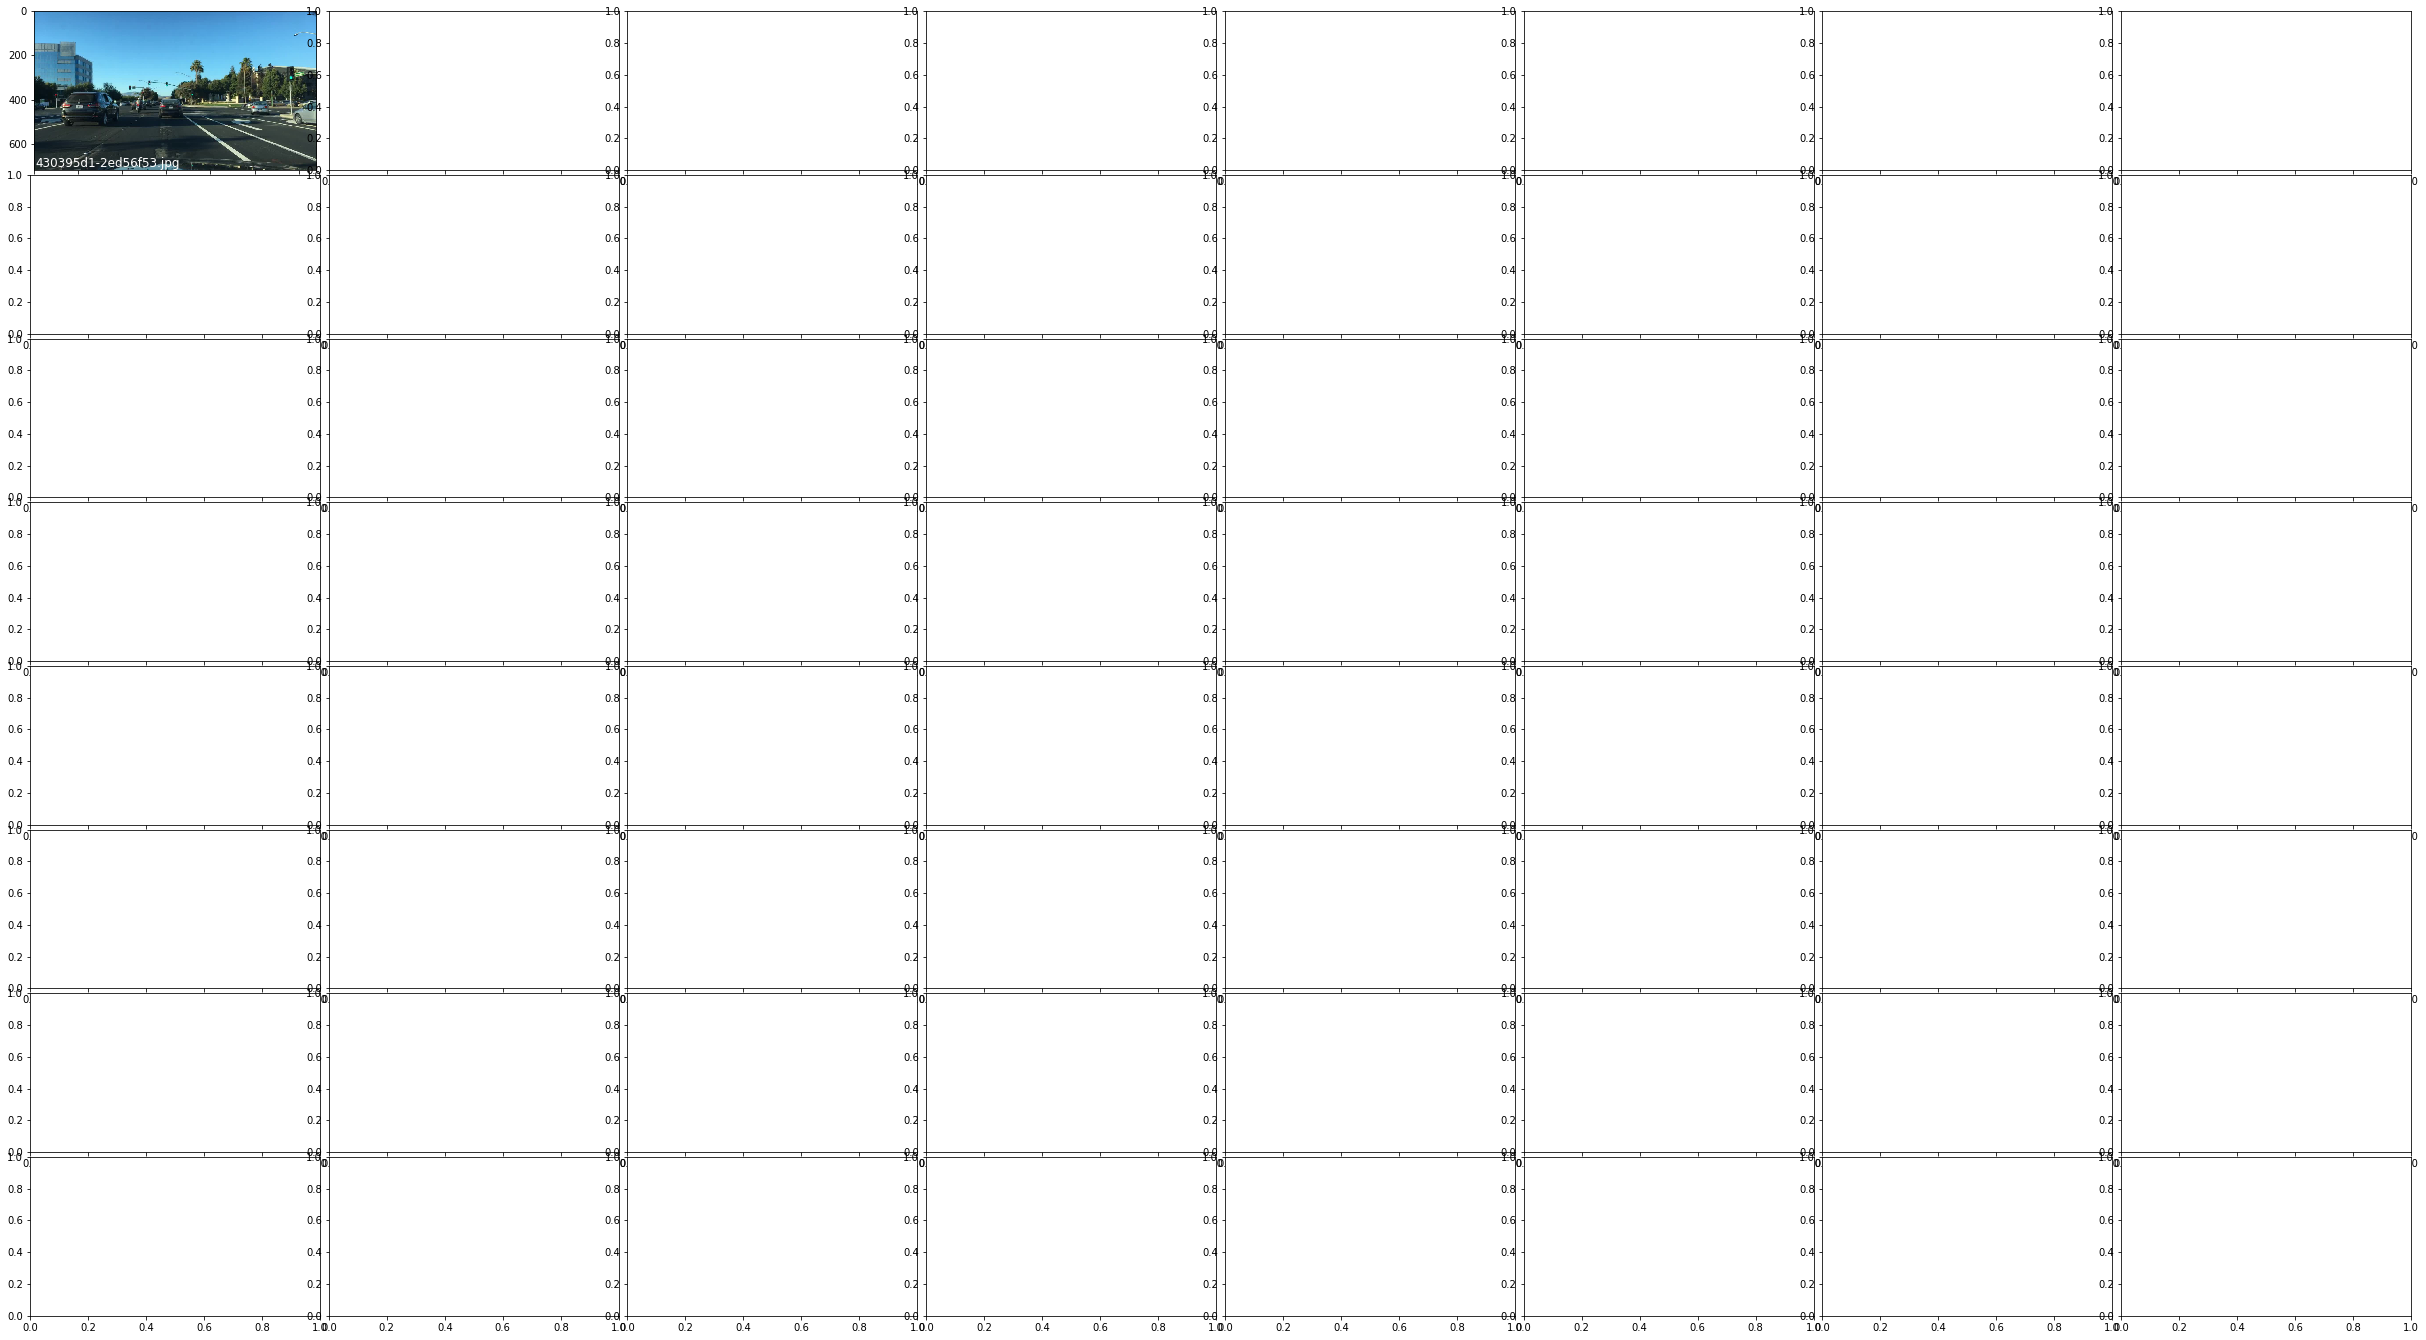

In [6]:
n_img_sample = 64
# for each data split
for split in list_splits:  # split / data partition to analyze
    # load data
    cur = EvalDataset(root_dir, database=split)
    cur.data = cur.data.drop(columns = ["labels"]).reset_index(drop = True)
    for weather in list_weather:  # split / data partition to analyze
        samp = cur.data.sample(n_img_sample,axis=0)
        image_list = samp.name.tolist()
        weather_list = samp.weather.tolist()
        tod_list = samp.timeofday.tolist()
        plot_imagegrid(image_list, \
                    save_name=save_path+split+"_"+weather, \
                    fig_title=os.path.basename(split+"_"+weather), \
                    show_name=True, \
                    labels=zip(weather_list, tod_list))
